<a href="https://colab.research.google.com/github/Kaviyakannan06/Machine-Learning-algorithms/blob/main/SVMipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

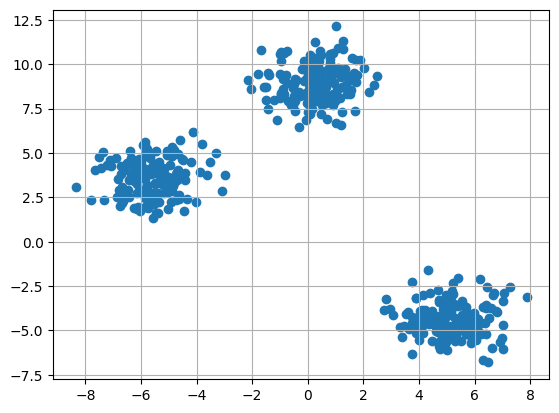

Initial Clusters: {0: {'center': array([0.06919154, 1.78785042]), 'points': []}, 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []}, 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}


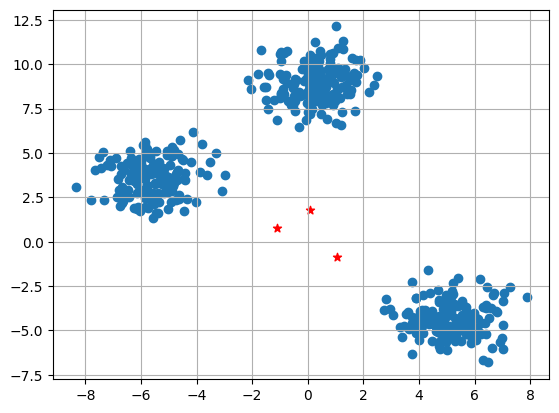

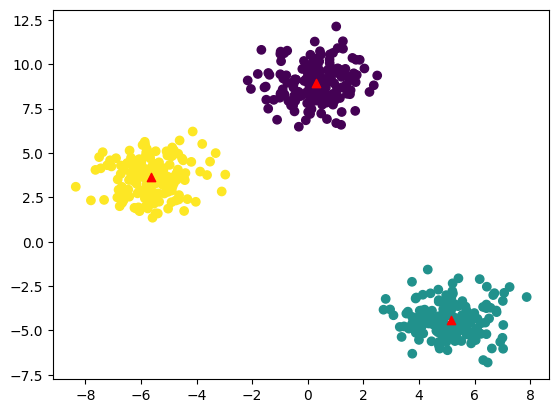

In [4]:





import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

# Number of clusters
k = 3

# Initial scatter plot
plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Initialize clusters
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2 * (2 * np.random.random((X.shape[1],)) - 1)  # random center
    clusters[idx] = {'center': center, 'points': []}

print("Initial Clusters:", clusters)

# Plot initial centers
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')
plt.show()

# Distance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to nearest cluster
def assign_clusters(X, clusters):
    for i in clusters:
        clusters[i]['points'] = []
    for idx in range(X.shape[0]):
        dist = [distance(X[idx], clusters[i]['center']) for i in range(k)]
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(X[idx])
    return clusters

# Update cluster centers
def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            clusters[i]['center'] = points.mean(axis=0)
    return clusters

# Predict cluster for each point
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = [distance(X[i], clusters[j]['center']) for j in range(k)]  # ✅ fixed
        pred.append(np.argmin(dist))
    return pred

# Run K-Means for fixed iterations
for _ in range(10):
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(clusters)

# Final predictions
pred = pred_cluster(X, clusters)

# Plot final clusters
plt.scatter(X[:, 0], X[:, 1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.show()
